![](https://github.com/GabrielTrentino/Projetos-de-Cursos/blob/master/04-EscolaDataScience/00%20-%20Imagens/001-TimeSeries.png?raw=true)
#Guia 001: Séries Temporais - Parte 1 - Análise Exploratória.

Série temporal é um **conjunto de dados que possui um espaçamento de tempo regular ou irregular** entre eles, podendo esse espaçamento ser de hora em hora, dia a dia, mês a mês. É marcado por uma *timestamp*: marcação do momento no tempo em que o evento foi registrado.

As análises desse notebook contêm series com **intervalores regulares.**

Para análises temporais, as técnicas de **Regressão Linear costumam não ser efetivas**, pois desconsideram a dimensão do tempo e seus efeitos de sazonalidade.

##Importação das Biliotecas:

Aqui importaremos algumas das bibliotecas essenciais para manipulação de dados.

In [1]:
#title
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Importando as bibliotecas necessárias:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style()

# Função para Obtenção dos Componentes da Time Series:
from statsmodels.tsa.seasonal import seasonal_decompose

# Melhorar visualização dos dados:
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Importando o Dataset: Produção Elétrica.

O Dataset disponibilizado pelo Professor Carlos Melo se refere ao consumo de energia elétrica ao decorrer dos mêses.

In [3]:
# Url do dataset :
dataset_path = "https://raw.githubusercontent.com/GabrielTrentino/Projetos-de-Cursos/master/04-EscolaDataScience/01-Datasets/001-Electric_Production.csv"

# Importar o csv para um dataframe:
df = pd.read_csv(dataset_path)

In [4]:
# Ver as 5 primeiras entradas:
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [5]:
# Verificando os tipos das variáveis do DataFrame:
df.dtypes

DATE      object
Value    float64
dtype: object

### Q1. Como Corrigir a Formatação das Datas?

A Data original do Dataset não é executada em diversas funções devido à não padronização dos formatos de Data que temos existentes na atualidade. Para isso, precisamos converter e padronizar para o formato ANO-MÊS-DIA.

Utilizamos a função do Pandas chamada de "to_datetime", em que ela precisa receber um formato de Data para conseguir [processar a String](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes).

Cado dado é indicado por "%" e sua sigla em sequência:

* `%m` - Indica mês;
* `%d `- Indica Dia;
* `%y `- Indica ano com 2 dígitos;
* `%Y `- Indica ano com 4 dígitos;
* `%M `- Indica minuto;
* `%H `- Indica Hora;

In [6]:
# Convertendo DATE para datetime para ser settado no Index do DataFrame:
df.index = pd.to_datetime(df.DATE, format = "%m-%d-%Y")

# Retirando a coluna DATE para não ficar repetido:
df.drop("DATE", axis = 1, inplace=True)

In [7]:
# Verificando as 5 primeiras entradas:
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


### Q2.Qual é a visualização desse Dataset?

Ao utilizar a função `to_datetime` podemos reparar que a ordem dos valores apresentados alteram, antes de utiliza-la os valores apresentados estavam no formato mês-dia-ano, após a utilização recebemos o formato em ano-mês-dia.

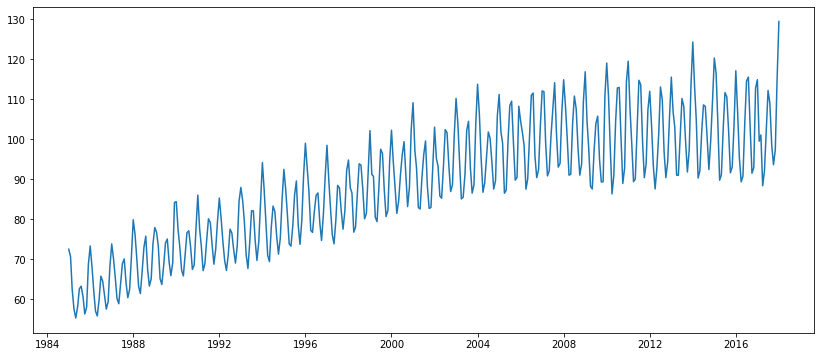

In [8]:
# Criando o objeto da figura:
fig, ax = plt.subplots (figsize = (14,6))

# Inserido as variáveis:
plt.plot(df.index, df.Value)

# Imprimindo o Gráfico:
plt.show();

###Q3. Quais são os Componentes da Série Temporal?

Em uma série Temporal temos 3 principais componentes que definem o comportamento dela:

* **Tendência** - Se traçarmos uma linha entre os valores médio, percebemos um movimento Crescente, Decrescente ou nulo?

* **Sazonalidade** - determinado de movimento Cíclico relativo ao Tempo. O consumo de energia pode diminuir ou aumentar em determinada hora do dia ou em determinada epóca do ano.

* **Residual** - Ou definido como ruído, são as pequenas alterações que não são determinadas pelos métodos anteriores.

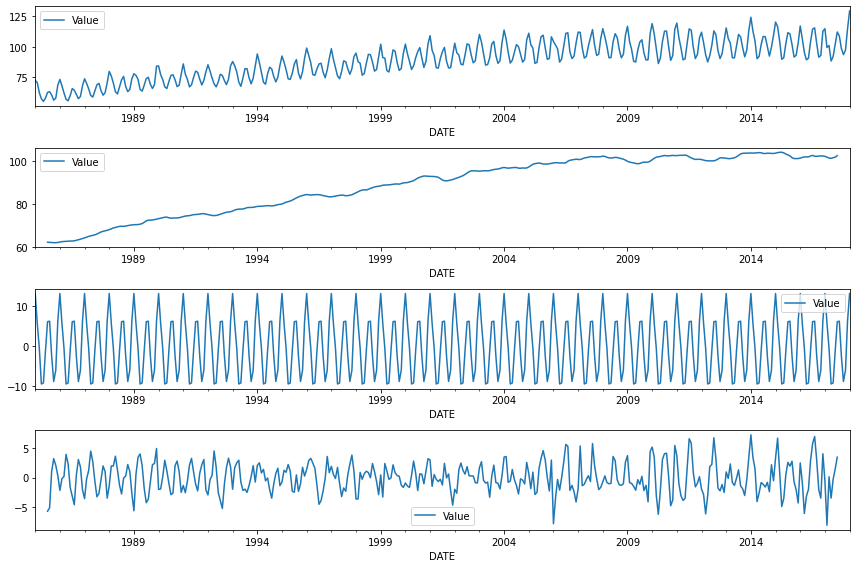

In [9]:
# Decompondo a Time Series (Retorna uma tupla com 4 elementos):
resultado = seasonal_decompose(df)

# Criando a Figura:
fig, (ax1, ax2, ax3 , ax4) = plt.subplots (4, 1, figsize=(12,8))

# Valores: Observado, Tendência, Sazonalidade e Residual:
resultado.observed.plot(ax = ax1)
resultado.trend.plot(ax = ax2)
resultado.seasonal.plot(ax = ax3)
resultado.resid.plot(ax = ax4)

plt.tight_layout();

##Importando o Segundo DataSet: Serviço Ferroviário.

Nesse segundo momento, utilizaremos um Dataset que mostra a quantidade de pessoas que utilizaram o serviço ferroviário em um determinado período, com **intervalos regulares de hora em hora.**

In [10]:
# Link do Dataset:
ferroviaria_dataset = "https://raw.githubusercontent.com/GabrielTrentino/Projetos-de-Cursos/master/04-EscolaDataScience/01-Datasets/001-CompanhiaFerroviaria.csv"

# Importar os dados da empresa ferroviária
df_trem = pd.read_csv(ferroviaria_dataset)

In [11]:
# Vendo os primeiros 5 termos desse Dataset:
df_trem.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


###Q4. Como Corrigir um Datetime em Horas?

Observamos que o formato atual do Datetime é DIA-MES-ANO HORAS-MINUTOS e, para que possamos utilizar essa Data no futuro, utilizamos a seguinte formatação:

`format = "%d-%m-%Y %H:%M"`, em que:

* `%d`- Representa dia;
* `%m `- Representa mês;
* `%Y `- Representa ano com 4 digitos;
* `%H `- Representa Horas;
* `%M `- Representa Minutos;

In [12]:
# Formatando Datetime para o padrão correto:
df_trem.Datetime = pd.to_datetime(df_trem.Datetime, format = "%d-%m-%Y %H:%M")

#Setando o Index como o Datetime:
df_trem.index = df_trem.Datetime

# Imprimindo os 5 primeiros valores:
df_trem.head()

,ID,Datetime,Count
Datetime,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2


### Q5. Qual é o quantitativo dos Clientes em relação ao tempo?

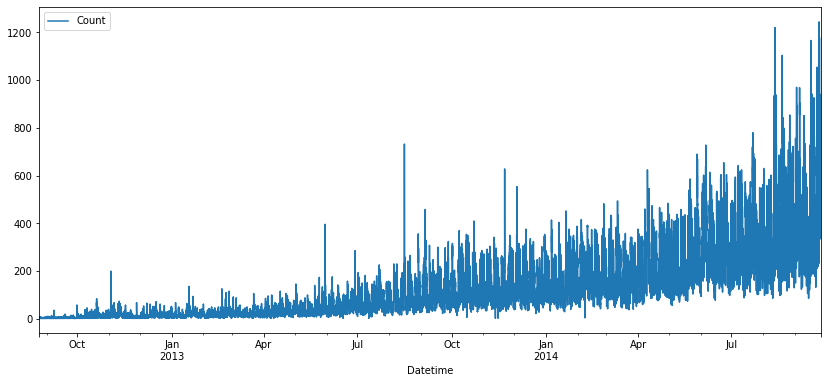

In [13]:
# Criando a figura com o pyplot:
fig, ax = plt.subplots(figsize = (14,6))

# Visualizando os Passageiros em relação ao tempo:
df_trem.plot(x = 'Datetime', y ='Count', ax = ax);

Podemos observar alguns determinados picos, que **podem indicar algumas hipoteses** para o comportamento, tais como:

1. Pessoas viajam mais durante a semana?
2. Há horários de pico por causa das indas e vindas por conta do trabalho?
3. Há períodos do mês onde a demanda por transporte é maior?

### Q6. Como Manipular o Datetime?

Utilizando o formato Datetime podemos pegar algumas informações específicas como ano, mês, dia, hora e dia da semana, por exemplo.

Há ainda a possibilidade de "criar" ou identificar o consumo nos finais de semana utilizando outra variável: `day_of_week`.

In [14]:
# Criando novas colunas no Dataset contendo informações relativa ao tempo:
df_trem['year'] = df_trem.Datetime.dt.year
df_trem['month'] = df_trem.Datetime.dt.month
df_trem['day'] = df_trem.Datetime.dt.day
df_trem['hour'] = df_trem.Datetime.dt.hour
df_trem['day_of_week'] = df_trem.Datetime.dt.dayofweek

Uma vez que o atributo `.dayofweek` retorna uma lista com os dias da semana, podemos aproveita-la para identificar se determinada data é um final de semana ou não.

**`dayofweek` retorna a seguinte lista:**

[ 0 , 1 , 2 , 3 , 4 , 5 , 6 ] , onde:

[seg, ter, qua, qui, sex, sab, dom]

Com isso, se o valor retornado for 5 ou 6, isso mostra que o movimento é originado do final de semana (`weekend`).

In [15]:
# Todos os dias não são finais de semana:
df_trem['weekend'] = 0

# Quando o Número for 5 ou 6, o registro é de um final de semana:
df_trem.loc[(df_trem.day_of_week==5) | (df_trem.day_of_week==6), 'weekend'] = 1

# Traz 5 resultados aleatórios:
df_trem.sample(5)

,ID,Datetime,Count,year,month,day,hour,day_of_week,weekend
Datetime,,,,,,,,,
2014-01-30 06:00:00,12558,2014-01-30 06:00:00,60,2014,1,30,6,3,0
2013-06-06 10:00:00,6850,2013-06-06 10:00:00,58,2013,6,6,10,3,0
2012-10-16 03:00:00,1251,2012-10-16 03:00:00,2,2012,10,16,3,1,0
2013-11-21 06:00:00,10878,2013-11-21 06:00:00,62,2013,11,21,6,3,0
2014-08-11 05:00:00,17189,2014-08-11 05:00:00,170,2014,8,11,5,0,0


### Q7. Quais são os Componentes da Série Temporal?

Continuando a manipulação dos dados, podemos ver a seguinte figura contendo a tendência, sazonalidade e residuo da Série Temporal:

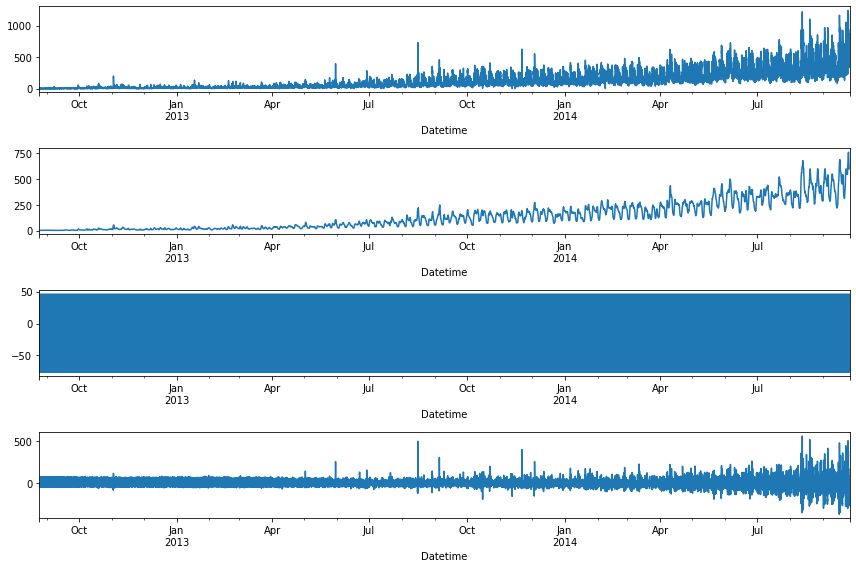

In [16]:
# Decompondo a Time Series (Retorna uma tupla com 4 elementos):
resultado = seasonal_decompose(df_trem.Count)

# Criando a Figura:
fig, (ax1, ax2, ax3 , ax4) = plt.subplots (4, 1, figsize=(12,8))

# Valores: Observado, Tendência, Sazonalidade e Residual:
resultado.observed.plot(ax = ax1)
resultado.trend.plot(ax = ax2)
resultado.seasonal.plot(ax = ax3)
resultado.resid.plot(ax = ax4)

plt.tight_layout();

###Q8. Qual é o consumo médio por Dia da Semana?

Além dos gráficos dos componentes da série temporal, podemos ainda verificar o consumo médio em determinados intervalos de tempo.

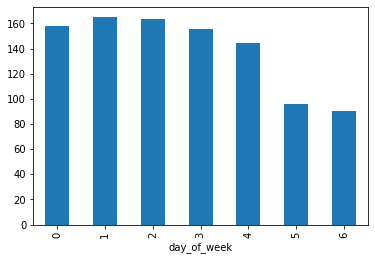

In [17]:
# Agrupa os dados por dia da semana e imprime a média em um gráfico de barra:
df_trem.groupby('day_of_week').Count.mean().plot.bar();

###Q9. Qual é o Consumo médio por Horas do dia?

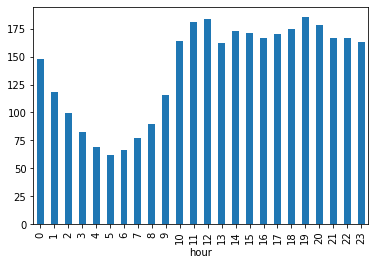

In [18]:
# Agrupa o Consumo por hora, obtem uma média por hora e gera um gráfico de barra:
df_trem.groupby('hour').Count.mean().plot.bar();

#Parte 2 - Técnicas de Forecasting.

Continuando com os estudos sobre a imensa área das Séries Temporais, é abordado Técnicas de Forecasting (Técnicas de Previsão) que podem vir a ser adotadas ao analisarmos qualquer série histórica.

Devem-se sempre atentar que todos métodos de predição sempre terão uma taxa de erro e, para as Séries Temporais, não seria diferente.

Alguma das técnicas que serão abordadas aqui são: **Naive Approach**, **Média Movel** e **Holt's Linear Model**. Para mensuramos o quão impreciso um modelo pode ser, utilizaremos a [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) ou, em português, [Erro Quadrático Médio](https://pt.wikipedia.org/wiki/Erro_quadr%C3%A1tico_m%C3%A9dio).

##Forecast Naive:

O Forecast Naive ou Método Ingênuo, essa técnica recebe esse nome devido a adoção do ultimo valor disponível para prever os próximos valores e, por conta disso, **desconsidera qualquer componente de um Time Series (Tendência, Sazonalidade e Ruídos).**

Para começarmos, separaremos o Dataset em duas partes: **Treino (`train`) e Validação (`valid`).**

Inicialmente o  Dataframe de Predição (`y_hat`) é criado através de uma cópia do DataFrame de Validação, para que assim, possamos ter a mesma quantidade de Instâncias (linhas).

O Método Naive (`y_hat['naive']`) **pega o ultimo valor do valor de Treino** e replica para as demais datas, para que assim, possamos comparar os valores de Validação.

**O DataFrame utilizado é o de Produção de Energia Elétrica.**

In [19]:
#Criando o DataFrame de Treino e Validação:
train = df[df.index <= '2012-8-1']
valid = df[df.index > '2012-8-1']

#Criando o DataFrame com o método Naive.
y_hat = valid.copy()

#Adotando o ultimo valor de Treino:
y_hat['naive'] = train.iloc[-1].values[0]

### Q10. Qual é a interpretação do Naive Approach?

Para facilitar o entedimento do Método Naive é plotado o seguinte gráfico:

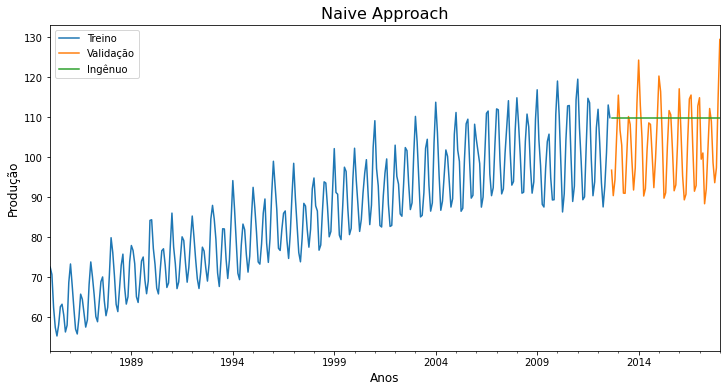

In [20]:
#Criando a figura com o pyplot:
fig, ax = plt.subplots(figsize = (12,6))

#Inserindo as variáveis do Gráfico:
train.plot(ax=ax)
valid.plot(ax=ax)
y_hat['naive'].plot(ax=ax)

#Inserindo Legenda:
plt.legend(['Treino', 'Validação', 'Ingênuo'])
plt.title('Naive Approach', fontsize=16)
plt.xlabel('Anos', fontsize=12)
plt.ylabel('Produção', fontsize=12);

### Q11. Qual o valor do Erro Quadrático Médio (Mean Squared error)?

Esse é uma das verificações que podemos utilizar para percebemos o quanto nossa previsão está precisa. O Erro Quadrático Médio pega a distância do valor real (`y_hat.Value`) com o valor previsto (`y_pred`da biblioteca, ou `y_hat.naive`) e eleva ao quadrado.

Ao elevar essa distância ao quadrado, **pontos que estão próximos proporcionarão valores menores**. Porém, **quanto maior a distância, maior será o Erro obtido.**

In [21]:
#Importando a biblioteca necessária para calcular esse EQM:
from sklearn.metrics import mean_squared_error

#Imprimindo o EQM:
print("RMSE = {:.3f}".format(mean_squared_error(y_hat.Value, y_hat.naive, squared=True)))

RMSE = 144.183


##Média Movel:

A Média Móvel é um Método de Previsão simples assim como o anterior, mas a diferença entre esses dois modelos é que: na Média Móvel é **utilizada uma janela de intervalo para prever o período seguinte**. Esse intervalo pode ser de horas, dias, anos e assim por diante.

Para os nossos estudos utilizaremos janelas de 7, 14 e 30 dias e compararemos os resultados entre cada um deles. Começando com um intervalo de 7 dias, criaremos uma coluna no DataFrame `y_hat`e denominaremos essa coluna de **`m7`**.

Para buscarmos o agrupamento de 7 atributos, utilizamos a função: `.rolling(7)` em que o argumento (o valor dentro do parenteses) pode ser qualquer número. Mas atente-se que ele irá pegar 7 Instâncias (7 linhas do Dataset) e não 7 Dias. Então ao utilizar **essa função é importante saber o intervalo de cada linha do seu Dataset.**

Em seguida é calculada a média (`mean()`) dos termos para que assim, peguemos o ultimo valor `[-1]`.

*  Após utilizarmos a janela de intervalo de 7 dias, iremos testar com a janela de 14 dias.

*  Por ultimo, iremos verificar a Janela de 30 dias. O procedimento é semelhante aos demais anteriores.

In [22]:
#Criando uma coluna com a ultima Média Móvel de 7 dias:
y_hat["m7"] = train.Value.rolling(7).mean().iloc[-1]

#Criando uma coluna com a ultima Média Móvel de 14 dias:
y_hat["m14"] = train.Value.rolling(14).mean().iloc[-1]

#Criando uma coluna com a ultima Média Móvel de 30 dias:
y_hat["m30"] = train.Value.rolling(30).mean().iloc[-1]

#### Q12. Quais são os Gráficos da Média Móvel?

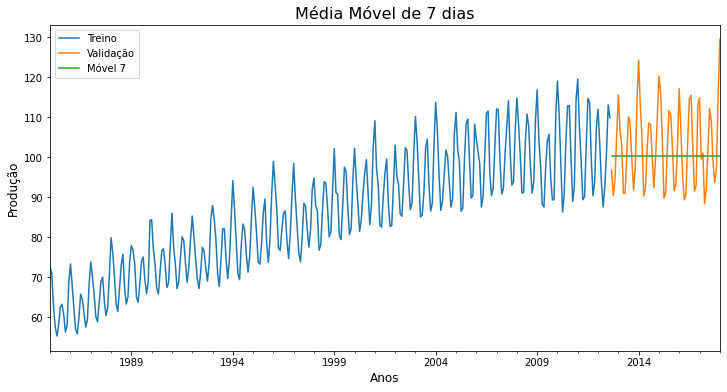

In [23]:
#Criando a figura com o pyplot:
fig, ax = plt.subplots(figsize = (12,6))

#Inserindo as variáveis do Gráfico:
train.plot(ax=ax)
valid.plot(ax=ax)
y_hat.m7.plot(ax=ax)

#Inserindo Legenda:
plt.legend(['Treino', 'Validação', 'Móvel 7'])
plt.title('Média Móvel de 7 dias', fontsize=16)
plt.xlabel('Anos', fontsize=12)
plt.ylabel('Produção', fontsize=12);

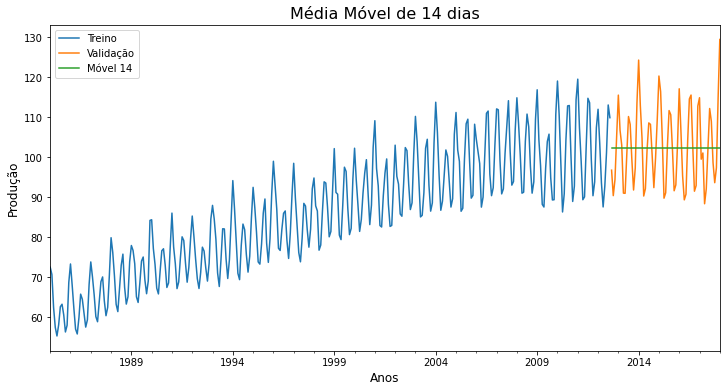

In [24]:
# Criando a figura com o pyplot:
fig, ax = plt.subplots(figsize = (12,6))

# Inserindo as variáveis do Gráfico:
train.plot(ax=ax)
valid.plot(ax=ax)
y_hat.m14.plot(ax=ax)

# Inserindo Legenda:
plt.legend(['Treino', 'Validação', 'Móvel 14'])
plt.title('Média Móvel de 14 dias', fontsize=16)
plt.xlabel('Anos', fontsize=12)
plt.ylabel('Produção', fontsize=12);

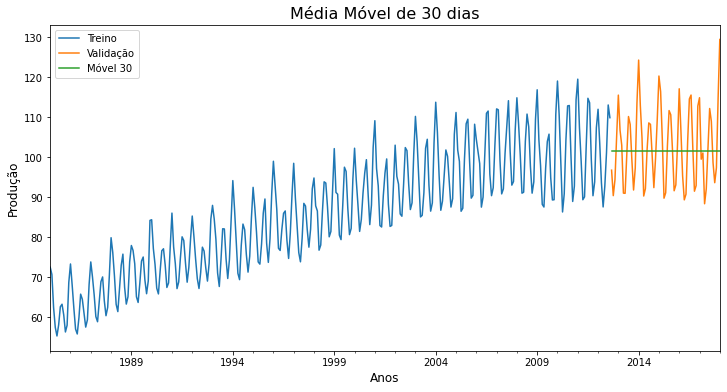

In [25]:
# Criando a figura com o pyplot:
fig, ax = plt.subplots(figsize = (12,6))

# Inserindo as variáveis do Gráfico:
train.plot(ax=ax)
valid.plot(ax=ax)
y_hat.m30.plot(ax=ax)

# Inserindo Legenda:
plt.legend(['Treino', 'Validação', 'Móvel 30'])
plt.title('Média Móvel de 30 dias', fontsize=16)
plt.xlabel('Anos', fontsize=12)
plt.ylabel('Produção', fontsize=12);

#### Q13. Quais são os Erros Quadrático Médio?

In [26]:
# Imprimindo o RMSE para a Média Móvel de 7 dias:
print("Média Móvel 7 dias  -> RMSE = {:.3f}".format(mean_squared_error(y_hat.Value, y_hat.m7, squared=True)))

# Imprimindo o RMSE para a Média Móvel de 14 dias:
print("Média Móvel 14 dias -> RMSE = {:.3f}".format(mean_squared_error(y_hat.Value, y_hat.m14, squared=True)))

# Imprimindo o RMSE para a Média Móvel de 30 dias:
print("Média Móvel 30 dias -> RMSE = {:.3f}".format(mean_squared_error(y_hat.Value, y_hat.m30, squared=True)))

Média Móvel 7 dias  -> RMSE = 101.213
Média Móvel 14 dias -> RMSE = 94.595
Média Móvel 30 dias -> RMSE = 96.298


Observamos que pela Média Móvel obtemos valores mais próximos do real quando comparamos com o modelo: Naive Approach. Porém, entre os modelos elaborados, o que possui maior aproximação do Real foi com o intervalo de 14 dias.

##Holt's Linear Model:

O Holt's Linear Trend Model leva em consideração tanto o nível quanto a tendência, e **tende a obter melhores resultados** que as técnicas mencionadas anteriormente.

Esse tipo de modelo permite trabalhos, predições ou especulações das futuras variáveis através da linha de tendência, para isso, usamos a biblioteca do Statsmodels `holtwinters`.

In [27]:
# Importando a Biblioteca para Determinar os componentes do TS:
from statsmodels.tsa.seasonal import seasonal_decompose

# Importando a Biblioteca para Utilizar Holt's Linear Model:
from statsmodels.tsa.holtwinters import Holt

### Q14. Como Utilizar a função Holt?
A função Holt ira criar uma linha de previsão de acordo com o `smoothing_level` e o `smoothing_slope` ao utilizar os dados do Treino (`train`).

In [28]:
#Criando a Coluna Holt:
y_hat['Holt'] = Holt(train.Value).fit(smoothing_level=0.1, smoothing_slope=0.1).forecast(len(valid))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


### Q15. Qual é o Gráfico desse Forecast?

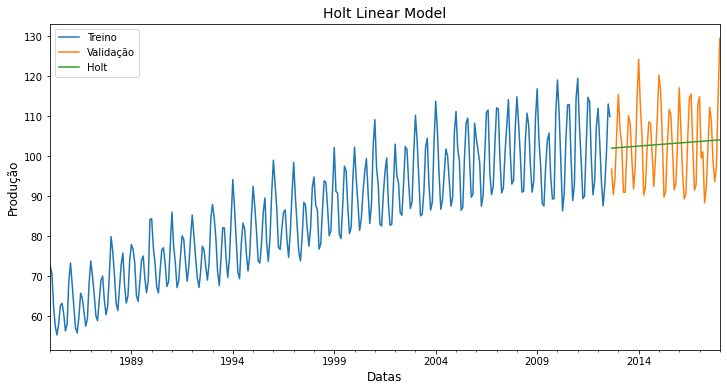

In [29]:
#Criando a figura no pyplot
fig, ax = plt.subplots(figsize=(12,6))

#Setando as variáveis em ax:
train.Value.plot(ax=ax)
valid.Value.plot(ax=ax)
y_hat['Holt'].plot(ax=ax)

#Corrigindo as legendas e Titulos
plt.legend(['Treino', 'Validação', 'Holt'])
plt.title('Holt Linear Model', fontsize = 14)
plt.xlabel('Datas', fontsize = 12)
plt.ylabel('Produção', fontsize = 12);

### Qual é o Erro Quadrático Médio?

In [30]:
#Imprimindo o RMSE:
print("RMSE = {:.3f}".format(mean_squared_error(y_hat.Value, y_hat.Holt, squared=True)))

RMSE = 93.792


# Parte 3 - Testes Estatísticos e ARIMA.

A terceira e ultima parte sobre Séries Temporais aborda a manipulação dos dados para tornar a Time Series em uma Série Estacionária, isto é, uma Série onde a média, variância e a covariância permanecem constantes na dimensão do tempo. 

Nessa aula, será visto métodos para a redução dos ruídos existentes (não conseguiremos eliminar 100% dos ruídos).

##Séries Estacionárias:

Primeiramente, o que é uma Série Estacionária?

* As Séries Estacionárias são um tipo de Time Series onde as médias, variância e efeitos de sazonalidade apresentam **valores quase constantes**. Para sabermos se uma Série é Estacionária ou não, utilizamos o **Teste de Dickey-Fuller**.



##Teste de Dickey Fuller:

Esse Teste é capaz de indicar se a Série é Estacionária ou não. Para isso, definimos uma Hipótese Nula (`Ho`) e uma Hipótese Alternativa (`H1`).

* `Ho` - É a Hipótese que a Time Series não é estacionária;
* `H1` - Rejetiamos a Hipótese Nula (TS pode ser Estacionária).

Para podermos verificarmos essa hipótese, calculamos o **valor de `p`**:

* $\text{Valor-p } \leq 0.05$ - Rejeitamos a Hipótese Nula.
* $\text{Valor-p } > 0.05$ - Não Rejeitamos a Hipótese Nula. 

In [31]:
#Importando a Biblioteca:
from statsmodels.tsa.stattools import adfuller

#Lendo o Dataset novamente:
df_est = pd.read_csv(dataset_path, index_col=0, squeeze=True)

In [32]:
#Extrair os valores que serão analisados no DataFrame:
X = df_est.values

In [33]:
#Aplicando a função pra retornar os valores Estatísticos:
result = adfuller(X)

print("Obtemos os seguintes resultados:")
print("Teste Estatístico: {:.4f}".format(result[0]))
print("Valor p: {:.4f}".format(result[1]))
print("Valores Criticos:")
for key, value in result[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Obtemos os seguintes resultados:
Teste Estatístico: -2.2570
Valor p: 0.1862
Valores Criticos:
	1%: -3.4476
	5%: -2.8692
	10%: -2.5708


Observamos aqui que a nossa Time Series (TS) é não-estacionária, pois o Valor-p possui como valor 18,62%. 

##Transformando a TS em Estacionária:

Vimos anteriormente que a nossa TS possui um valor `p` equivalente a 18.62%, para que possamos torna-la uma Série Estacionária, devemos reduzir esse valor obtido.



##Aplicando Logaritmo para reduzir os ruídos:

Um dos primeiros passos a serem realizados para reduzirmos o valo `p` obtido é reduzir as diferenças causadas pelos ruídos. Para isso, aplicamos logaritmo:

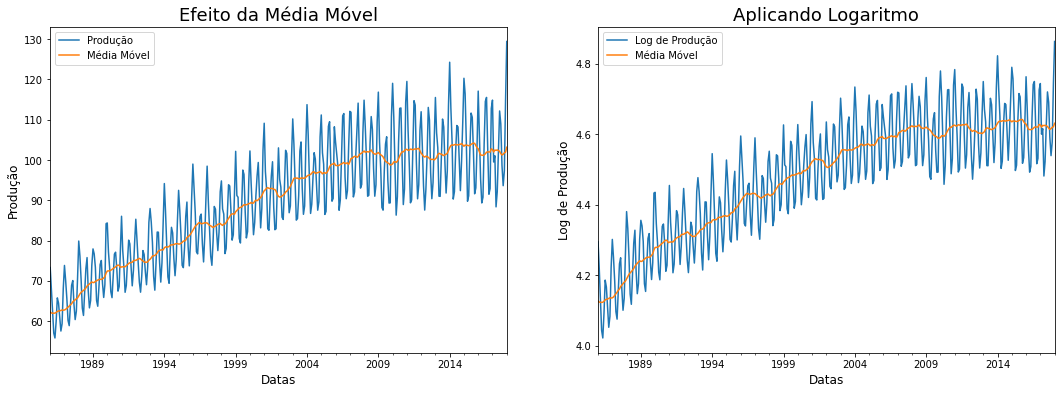

In [34]:
#Criando a média móvel:
med_movel = df.rolling(12).mean()

#Aplicando Logaritmo:
df_log = np.log(df)

#Obtendo a média móvel do logaritmo:
ma_log = df_log.rolling(12).mean()

#Criando a figura no Pyplot:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18,6))

#Inserindo os valores no primeiro gráfico:
df[12:].plot(ax=ax1)
med_movel[12:].plot(ax=ax1)

#Formatando o primeiro gráfico:
ax1.set_title("Efeito da Média Móvel", fontsize = 18)
ax1.legend(['Produção', 'Média Móvel'])
ax1.set_xlabel('Datas', fontsize = 12)
ax1.set_ylabel('Produção', fontsize = 12)

#Inserido os valores nos segundo gráfico:
df_log[12:].plot(ax=ax2)
ma_log[12:].plot(ax=ax2)

#Formatando o segundo gráfico:
ax2.set_title("Aplicando Logaritmo", fontsize = 18)
ax2.legend(['Log de Produção', 'Média Móvel'])
ax2.set_xlabel('Datas', fontsize = 12)
ax2.set_ylabel('Log de Produção', fontsize = 12);

Como podemos observar: ao comparar as duas imagens obtidas, vimos que com o Logartimo, reduzimos a quantidade de variação causada pelos ruídos. Podemos ver esse resultado ao compararmos as escalas entre esses gráficos: a primeira imagem temos uma escala que inicia do 60 indo até o 130; enquanto que a segunda imagem a escala varia de 4.0 para 4.8.

##Aplicando Diferenciação para reduzirmos a linha de Tendência:

Uma outra forma de aumentarmos ainda mais as nossas porcentagens para classificar essa Time Series como Estacionária é reduzir a linha de Tendência. Essa redução pode ser feita ao diferenciarmos (subtrair) os valores da média móvel.

In [35]:
#Subtraindo o logartimo da média móvel:
df_sub = (df_log - ma_log).dropna()

#Obtendo a nova média móvel:
ma_sub = df_sub.rolling(12).mean()

#Obtendo o Desvio Padrão:
std_sub = df_sub.rolling(12).std()

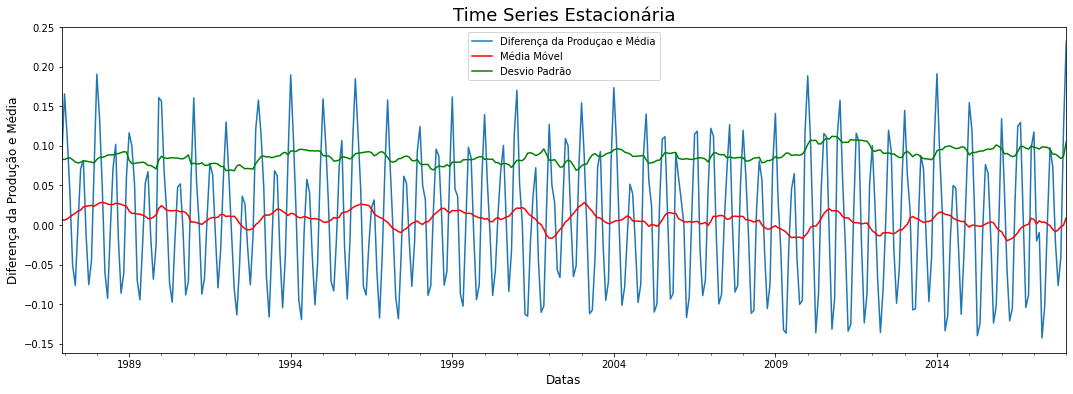

In [36]:
fig, ax = plt.subplots(figsize = (18,6))

#Inserindo os valores no primeiro gráfico:
df_sub[12:].plot(ax=ax)
ma_sub[12:].plot(ax=ax, color = 'r')
std_sub[12:].plot(ax=ax, color = 'g')

#Formatando o primeiro gráfico:
ax.set_title("Time Series Estacionária", fontsize = 18)
ax.legend(['Diferença da Produçao e Média', 'Média Móvel', 'Desvio Padrão'])
ax.set_xlabel('Datas', fontsize = 12)
ax.set_ylabel('Diferença da Produção e Média', fontsize = 12);

Vimos que dessa forma, estamos calculando a Diferença da produção em cima da média. E ao repetir o teste de Dickey Fuller Aumentado, obtemos o seguinte resultado:

In [37]:
# Repetir o ADF:
X_sub = df_sub.Value.values

# Aplicar ADF e imprimir o resultado:
result_sub = adfuller(X_sub)
print('Dickey-Fuller Aumentado')
print('Teste Estatístico: {:.4f}'.format(result_sub[0]))
print('Valor-p: {:.10f}'.format(result_sub[1]))
print('Valores Críticos:')
for key, value in result_sub[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Dickey-Fuller Aumentado
Teste Estatístico: -5.2116
Valor-p: 0.0000083256
Valores Críticos:
	1%: -3.4481
	5%: -2.8694
	10%: -2.5709


Otimo! O valor-p desse teste ADF nos mostra que ja podemos classificar esse nosso processo de uma série estacionária, mas caso haja ainda a necessidade de reduzir ainda mais esse Valor-p, podemos subtrair uma linha pela outra, obtendo a Diferença entre os valores com a função `.diff(1)`.

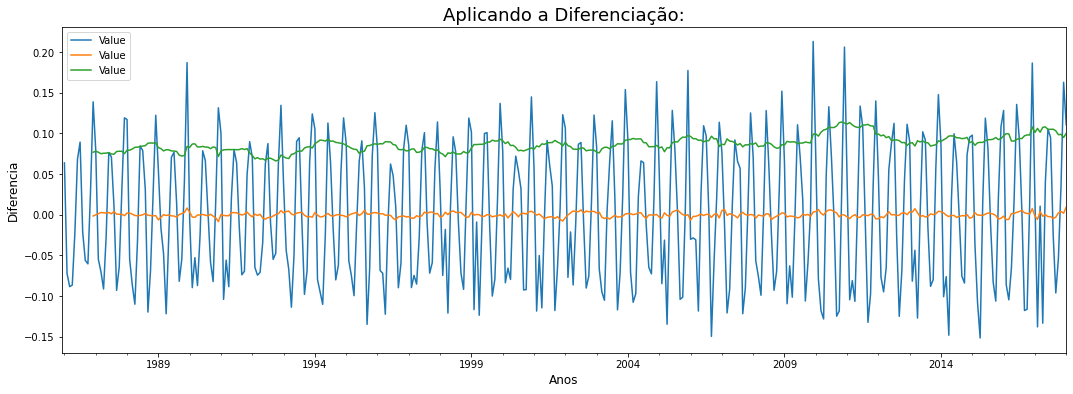

In [38]:
#Aplicando a Diferenciação:
df_diff = df_sub.diff(1)

#Obtendo a nova média móvel (moving_average):
ma_diff = df_diff.rolling(12).mean()

#Obtendo o novo desvio padrão:
std_diff = df_diff.rolling(12).std()

#Criando a figura no Pyplot:
fig, ax = plt.subplots(figsize = (18,6))


df_diff.plot(ax=ax)
ma_diff.plot(ax=ax)
std_diff.plot(ax=ax)

#Formatando o gráfico:
plt.title("Aplicando a Diferenciação:", fontsize = 18)
plt.xlabel("Anos", fontsize = 12)
plt.ylabel("Diferencia", fontsize = 12);

Agora, ao aplicarmos o Teste ADF novamente, obtemos o seguinte resultado:

In [39]:
# Repetir o ADF:
X_diff = df_diff.Value.dropna().values

# Aplicar ADF e imprimir o resultado:
result_diff = adfuller(X_diff)
print('Dickey-Fuller Aumentado')
print('Teste Estatístico: {:.4f}'.format(result_diff[0]))
print('Valor-p: {:.10f}'.format(result_diff[1]))
print('Valores Críticos:')
for key, value in result_diff[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Dickey-Fuller Aumentado
Teste Estatístico: -7.6511
Valor-p: 0.0000000000
Valores Críticos:
	1%: -3.4483
	5%: -2.8694
	10%: -2.5710


O Valor-p obtido é ridiculamente inferior ao nosso limite de 5% proposto anteriormente.

##Forecasting ARIMA:

O Modelo Auto-Regressivo Integrado de Médias Móveis (*Autoregressive Integrated Moving Average* ou **ARIMA**, na sigla em inglês) são utilizados com a finalidade de prever os comportametnos de séries temporais.

É uma classe de modelo que consegue capturar um conjunto de diferentes estruturas temporais dados de TS. O acrônimo ARIMA significa:

* **AR: Autoregression**, pois usa a relação de dependência entre uma observação e um número de lagged observations.
* **I: Integrated**, pois usa a diferenciação das observações raw para transformar a TS em estacionária.
* **MA: Moving Average**, pois usa a dependência entre uma observação e o erro residual proveniente de uma média móvel aplicada a lagged observations.

Cada um desses componentes são representados por um parâmetro do modelo. Por esse fato, é muito comum ver a notação $ARIMA(p, d, q)$.

Para encontrar os parâmetros otimizados de p, d, e q, usaremos as funções ACF (Autocorrelação) e PACF (Autocorrelação Parcial).

In [40]:
# Importando as bibliotecas necessárias para o ARIMA:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(df_diff.dropna(), nlags=25)
lag_pacf = pacf(df_diff.dropna(), nlags = 25)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Além de plotar os gráficos para ACF e PACF, vamos plotar os limites críticos. Ou seja, 5% da autocorrelação (parcial) para TS estacionárias, $1.96 / \sqrt{(N - d)}$, onde $N$ é o número de pontos do dataset e $d$ é o número de vezes que diferenciamos os dados.

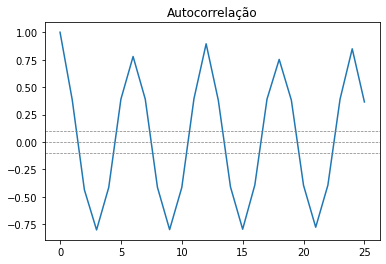

In [41]:
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=-1.96 / np.sqrt((len(df_diff) - 1)), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=1.96 / np.sqrt((len(df_diff) - 1)), linestyle='--', color='gray', linewidth=0.7)
plt.title("Autocorrelação")
plt.show()

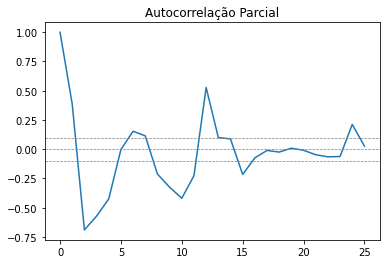

In [42]:
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=-1.96 / np.sqrt((len(df_diff) - 1)), linestyle='--', color='gray', linewidth=0.7)
plt.axhline(y=1.96 / np.sqrt((len(df_diff) - 1)), linestyle='--', color='gray', linewidth=0.7)
plt.title("Autocorrelação Parcial")
plt.show()

In [43]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df_log, order = (2,1,2))
result_AR = model.fit(disp=-1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


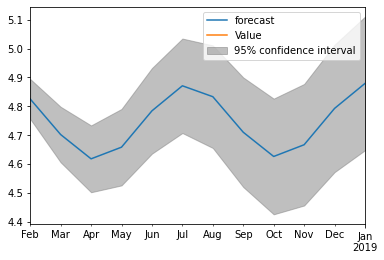

In [44]:
result_AR.plot_predict(start="2018-02-01", end="2019-01-01");

# CONCLUSÕES:

Esse Notebook/Guia tem como finalidade resumir e sintetizar o que foi passado nas aulas da Escola de Data Science 1, 2 e 3 que tiveram como tema: Series Temporais. Em seguida, estarão disponibilizados os notebooks no Github do professor [Carlos Melo](https://github.com/carlosfab)

* [Notebook da Aula 1 do Professor](https://github.com/carlosfab/escola-data-science/blob/master/notebooks/Aula_001_S%C3%A9ries_Temporais_(Time_Series)_Parte_1.ipynb)

* [Notebook da Aula 2 do Professor](https://github.com/carlosfab/escola-data-science/blob/master/notebooks/Aula_002_S%C3%A9ries_Temporais_(Time_Series)_Parte_2.ipynb)

* [Notebook da Aula 3 do Professor](https://github.com/carlosfab/escola-data-science/blob/master/notebooks/Aula_003_S%C3%A9ries_Temporais_(Time_Series)_Parte_3.ipynb)


Qualquer duvida ou sugestão, encaminhe uma mensagem para o meu [LinkedIn](https://www.linkedin.com/in/gabriel-trentino-froes-415558144/)
